In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

`isr.umich.edu-psid-inequality-1.1.1` Last Update: 2023-06-06T00:04:04

__


## Documentation Links

* [PSID Homepage](https://psidonline.isr.umich.edu/default.aspx) 

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* **[psid_ineq](data/psid_ineq.csv)**. PSID, Inequality extract
* **[_labels](data/_labels.csv)**. Categorical value labels
* **[data_dictionary](data/data_dictionary.csv)**. List of Variables

## References
<ul><li> <strong>source</string>, <em>data/J320886.dbf</em>. Downloaded source file</li><li> <strong><a href="https://psidonline.isr.umich.edu/help/xyr/psid.xlsx">variables</a></strong>. Variable descriptions, in a cross-year format.</li><li> <strong>codebook</string>, <em>data/J320886_codebook.xml</em>. Variable descriptions and value labels</li><ul>

In [3]:
labels = pkg.resource('_labels').dataframe()

In [4]:
dd = pkg.resource('data_dictionary').dataframe()
dd['name'] = dd['name'].str.lower()
dd.head()

,year,type_id,name,label,qtext,etext,type,category,text,head_wife,var_count,path
0,1968,0,er30000,RELEASE NUMBER,Release Number,For Release 2 we have updated Relation to Hea...,INDIVIDUAL,SURVEY INFORMATION,01>SURVEY INFORMATION:\n02>Interview Informati...,NaN,1,/survey information:/interview information/rel...
1,1968,0,er30001,1968 INTERVIEW NUMBER,1968 Interview Number (1968 ID Number),This variable is the 1968 family ID number. T...,INDIVIDUAL,SURVEY INFORMATION,01>SURVEY INFORMATION:\n02>Interview Informati...,NaN,41,/survey information:/interview information/id ...
2,1968,0,er30002,PERSON NUMBER 68,Person Number,,INDIVIDUAL,SURVEY INFORMATION,01>SURVEY INFORMATION:\n02>Interview Informati...,NaN,1,/survey information:/interview information/per...
3,2001,1,er17001,RELEASE NUMBER,Release Number,"May 2008: Variables ER20395-ER20458, formerly...",FAMILY PUBLIC,SURVEY INFORMATION,01>SURVEY INFORMATION\n02>Interview Informatio...,NaN,16,/survey information/interview information/rele...
4,2001,1,er17012,# IN FU,Number of Persons in FU at the Time of the 200...,This variable represents the actual number of ...,FAMILY PUBLIC,FAMILY COMPOSITION,01>FAMILY COMPOSITION\n02>Current:\n03>number ...,NaN,41,/family composition/current:/number in family ...


In [5]:

df = pkg.resource('psid_ineq').dataframe(convert_categorical=True)
df.head()

,pid,er30001,er30002,er30000,er33601,er33701,er33801,er33901,er34001,er34101,...,er46502,er51863,er57603,er51957,er57713,er64873,er27446,er40618,er46596,er23478
0,7,4,3,"Release number 3, June 2022",96,1392,289,148,13,218,...,832.0,832.0,NaN,936.0,NaN,NaN,936.0,936.0,936.0,936.0
1,8,4,4,"Release number 3, June 2022",5987,6278,2356,5399,1827,8397,...,0.0,0.0,0.0,516.0,516.0,NaN,516.0,516.0,516.0,516.0
2,9,4,5,"Release number 3, June 2022",6872,7782,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,742.0
3,10,4,6,"Release number 3, June 2022",5599,4812,4097,720,1840,2541,...,0.0,0.0,0.0,476.0,476.0,476.0,476.0,476.0,476.0,476.0
4,11,4,7,"Release number 3, June 2022",7091,0,6880,0,1840,2541,...,0.0,0.0,0.0,476.0,476.0,476.0,832.0,NaN,476.0,NaN


In [6]:
# The race of each record will be the race of the head of household, which will be collpased from
# multipe values over multiple years. Apparently they ask for race every year, so it can change from year to
# year. 
#
# L40 is 'race of head'

roh_cols = dd[dd.label.str.contains('L40')].name.str.lower().to_list()

# race_map = { k:'' for k in df[roh_cols].stack().unique() }

race_map = {
 'White': 'white',
 'NA; DK': 'na',
 'Black': 'black',
 'Black, African-American, or Negro': 'black',
 'NA; refused': 'na',
 'American Indian or Alaska Native': 'aian',
 'Other': 'other',
 'Mentions Latino origin or descent': 'hisp',
 'Latino origin or descent': 'hisp',
 'DK; NA': 'na',
 'DK; NA; refused': 'na',
 'Asian, Pacific Islander': 'aapi',
 'Asian': 'asian',
 'American Indian, Aleut, Eskimo': 'aian',
 'Wild code': 'na',
 'Native American': 'aian',
 'Native Hawaiian or Pacific Islander': 'nhopi',
 'Mentions color other than black or white': 'other',
 'Color besides black or white': 'other',
  None: 'na'}

t =df[roh_cols].replace(race_map).fillna('na').mode(axis=1)

rows  = []
for idx, r in t.replace({'na':'zzz'}).iterrows():
    rows.append(r.sort_values())
    
df['race'] = pd.DataFrame(rows)[0]

In [7]:
t = df.groupby('er30001').pid.count()
t.index[t.argmax()]
df[df.er30001==1695.0]


,pid,er30001,er30002,er30000,er33601,er33701,er33801,er33901,er34001,er34101,...,er51863,er57603,er51957,er57713,er64873,er27446,er40618,er46596,er23478,race
12471,1696,1695,1,"Release number 3, June 2022",4162,4627,560,0,0,0,...,NaN,NaN,NaN,NaN,NaN,775.0,NaN,NaN,962.0,zzz
12472,1697,1695,2,"Release number 3, June 2022",4162,4627,560,1800,2763,491,...,0.0,0.0,775.0,775.0,775.0,775.0,775.0,775.0,962.0,white
12473,1698,1695,3,"Release number 3, June 2022",3303,2445,816,658,3157,831,...,880.0,880.0,562.0,562.0,562.0,562.0,562.0,562.0,562.0,white
12474,1699,1695,4,"Release number 3, June 2022",2671,2341,2100,1753,2707,112,...,411.0,411.0,962.0,962.0,962.0,962.0,962.0,962.0,962.0,white
12475,1700,1695,5,"Release number 3, June 2022",2669,3762,1245,0,0,0,...,NaN,NaN,NaN,NaN,NaN,810.0,NaN,NaN,810.0,zzz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,1972,1695,277,"Release number 3, June 2022",5565,5482,2463,1459,7603,8352,...,0.0,0.0,405.0,405.0,623.0,651.0,651.0,405.0,651.0,white
12628,1973,1695,278,"Release number 3, June 2022",5565,5482,2463,1459,7603,8352,...,0.0,0.0,405.0,405.0,623.0,651.0,651.0,405.0,651.0,white
12629,1974,1695,279,"Release number 3, June 2022",2787,3023,1395,1465,5257,1759,...,472.0,472.0,402.0,402.0,0.0,402.0,402.0,402.0,402.0,white
12630,1975,1695,280,"Release number 3, June 2022",4803,2470,2011,6554,5499,8286,...,874.0,NaN,999.0,NaN,874.0,999.0,999.0,999.0,999.0,white


<AxesSubplot: >

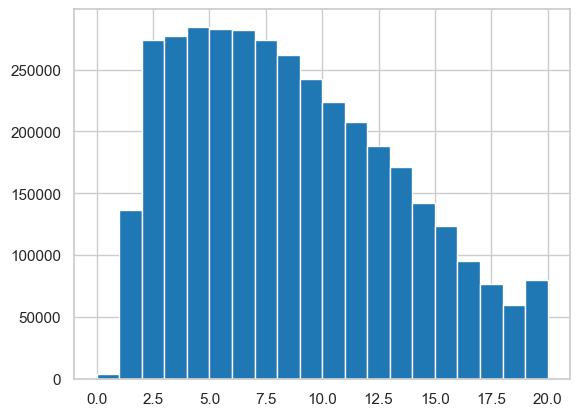

In [35]:
# Unweighted age of vehicles

# COlumns that mention the model year
ml_cols = dd[dd.label.str.contains('MODEL YEAR')].name.str.lower().to_list()

# Add in the pid and remove non-year codes
t =df[['pid']+ml_cols].set_index('pid').replace([0, -1, 9997, 9998, 9999],None)

# Subtract from the year for each colum to get age. 
for c in ml_cols:
    year = dd[dd['name'] == c].iloc[0].year +1 # The min ages were -1
    t[c] = year-t[c]

# Re-add race
t = df[['pid','race']].merge(t.reset_index())

# Stack so we can use group
t = t.set_index(['pid','race']).stack().to_frame('age').reset_index()

t.age.hist(bins=20)

In [36]:
df[['er30001','er33601','er33602']]

,er30001,er33601,er33602
0,4,96,1
1,4,5987,1
2,4,6872,2
3,4,5599,2
4,4,7091,1
...,...,...,...
41448,6872,5477,0
41449,6872,3616,0
41450,6872,3616,0
41451,6872,5477,0


In [48]:
df.er33601.nunique()

7407

In [55]:
df.groupby('er33601').pid.count().sort_values(ascending=False)

er33601
0       3639
4216      42
6512      39
4060      39
297       35
        ... 
5461       1
6550       1
6549       1
4668       1
6674       1
Name: pid, Length: 7407, dtype: int64

In [60]:
df[df.er33601 == 6131].er33603.value_counts()

Inap.:  from Latino sample (ER30001=7001-9308); from Immigrant 2017 sample (ER30001=4001-4851); main family nonresponse by 2001 or mover-out nonresponse by 1999 (ER33601=0); born or moved in after the 2001 interview (ER33601&gt;0 and ER33602=0)    17
Grandson or granddaughter of Head (includes grandchildren of legal Wife (code 20), but those of a cohabitor are coded 97)                                                                                                                                5
Head in 2001; 1999 Head who was mover-out nonresponse by the time of the 2001 interview                                                                                                                                                                  2
Great-grandson or great-granddaughter of Head (includes great-grandchildren of legal Wife (code 20), but those of a cohabitor are coded 97)                                                                                                            

In [62]:
df.er33602.value_counts()

0     20053
1      7406
2      5708
3      3638
4      2243
5       918
71      392
6       316
51      258
7       119
81      114
72      102
73       44
8        44
52       41
9        17
74       16
10        9
53        5
75        4
11        3
13        1
12        1
82        1
Name: er33602, dtype: Int64